In [4]:
import numpy as np
import filtering as flt
import matplotlib.pyplot as plt

## Figure 2a and Figure 2b

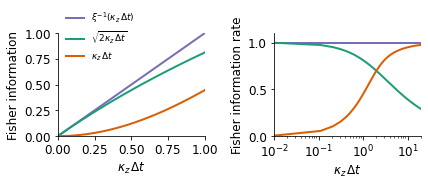

In [5]:
def infFisher(alpha):
    I = flt.xi(alpha)
    return I

T = 1
dt = np.linspace(0.001,T,100)
alpha = np.array([flt.xi_fun_inv(dt_i) for dt_i in dt])
alpha_sqrt = np.sqrt(2*dt)
alpha_lin = dt

fig, ax = plt.subplots(ncols=2,figsize = (6,3),tight_layout=True)
col_xi = '#7570B3'
col_sqrt = '#1B9E77'
col_lin = '#d95f02'
col_xi_1 = '#C3C1DF'
col_sqrt_1 = '#87EBCD'
col_lin_1 = '#FEB984'
plt.rcParams.update({'font.size': 12})

# plots the Fisher information per observation
ax[0].plot(dt,infFisher(alpha),label=r'$\xi^{-1}(\kappa_z \,\Delta t)$',linewidth=2,color=col_xi)
ax[0].plot(dt,infFisher(alpha_sqrt),label=r'$\sqrt{2 \kappa_z \,\Delta t}$',linewidth=2,color=col_sqrt)
ax[0].plot(dt,infFisher(alpha_lin),label=r'$\kappa_z \, \Delta t$',linewidth=2,color=col_lin)
ax[0].set_ylim([0,T])
ax[0].set_xlim([0,T])
ax[0].set_ylabel('Fisher information')
ax[0].set_xlabel(r'$\kappa_z \, \Delta t$')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend(fontsize=9,frameon=False,loc='upper left',bbox_to_anchor=(0, 1.3))

T = 20
dt = np.linspace(0.01,T,200)
alpha = np.array([flt.xi_fun_inv(dt_i) for dt_i in dt])
alpha_sqrt = np.sqrt(2*dt)
alpha_lin = dt

# plots the Fisher information rate
ax[1].plot(dt,infFisher(alpha)/dt,label=r'$\xi^{-1}(\Delta t)$',linewidth=2,color=col_xi)
ax[1].plot(dt,infFisher(alpha_sqrt)/dt,label=r'$\sqrt{2 \Delta t}$',linewidth=2,color=col_sqrt)
ax[1].plot(dt,infFisher(alpha_lin)/dt,label=r'$\Delta t$',linewidth=2,color=col_lin)
ax[1].set_ylim([0,1.1])
ax[1].set_xscale('log')
ax[1].set_xlim([dt[0],T])
ax[1].set_ylabel('Fisher information rate')
ax[1].set_xlabel(r'$\kappa_z \, \Delta t$')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.show()


## Figure 2c

In [6]:
###### simulation parameters
nIter = 10
T = 10 # simulation time
dt = np.array([0.001,0.01,0.1]) # step size
kappa_phi = 100 # inverse diffusion constant
kappa_y = 0 # no increment observations
kappa_z = 100
kappa_z_array = np.zeros([len(dt),3])
for i in range(len(dt)):
    kappa_z_array[i] = [flt.xi_fun_inv(kappa_z*dt[i]), np.sqrt(2*kappa_z*dt[i]), 
                            kappa_z * dt[i]]
phi_0 = 0 # initial mean
kappa_0 = 20 # initial certainty


In [7]:
filename = "data_processed/dt_scaling_simulation"

runnew = False # set to True if you want to run, otherwise load data

if runnew:
    # runs 10 simulations for each dt and alpha
    np.random.seed(20)
    phi_0 = 1/4 * np.pi
    kappa_avg = np.zeros([kappa_z_array.shape[0],kappa_z_array.shape[1],int(T/dt[0])])
    mu_avg = np.zeros([kappa_z_array.shape[0],kappa_z_array.shape[1],int(T/dt[0])])
    for i in range(len(dt)):
        # generate data - fix a position and draw observations from it
        phi = phi_0 * np.ones(int(T/dt[i]))
        ind0 = 0
        ind1 = int(T/dt[i]) 
        for j in range(len(kappa_z_array[i])):
            mu = np.zeros([nIter,ind1])
            kappa = np.zeros([nIter,ind1])
            for k in range(nIter):
                z = np.random.vonmises(phi,kappa_z_array[i,j])
                mu[k], kappa[k] = flt.PF_run(T,1000,kappa_phi,z=z,
                            alpha=kappa_z_array[i,j],
                            phi_0=0,kappa_0=20,dt=dt[i])
            mu_avg[i,j,ind0:ind1] = np.average(mu,axis=0)
            kappa_avg[i,j,ind0:ind1] = np.average(kappa,axis=0)

    # where to save
    np.savez(filename,mu=mu_avg,kappa=kappa_avg,kappa_z_array=kappa_z_array,dt_array=dt,T=T)

    print('Simulation done \n')

data = np.load(filename+'.npz')
kappa = data['kappa']
mu = data['mu']

Simulation done 



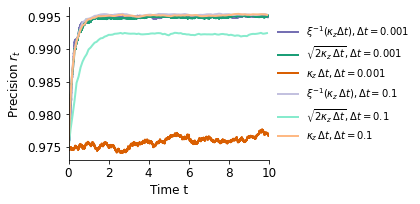

In [8]:
### plot the results 
fig, ax = plt.subplots(figsize = (6,3),tight_layout=True)
i = 0
ind0 = 0
ind1 = int(T/dt[i]) 
t = np.arange(0,T,dt[i])

ax.plot(t,kappa[i,0,ind0:ind1],color=col_xi,label=r'$\xi^{-1}(\kappa_z \Delta t), \Delta t = $'+str(dt[i]),linewidth=2)
ax.plot(t,kappa[i,1,ind0:ind1],color=col_sqrt,label=r'$\sqrt{2 \kappa_z \, \Delta t}, \Delta t = $'+str(dt[i]),linewidth=2)
ax.plot(t,kappa[i,2,ind0:ind1],color=col_lin,label=r'$\kappa_z \, \Delta t,\Delta t = $'+str(dt[i]),linewidth=2)

i = 2
ind0 = 0
ind1 = int(T/dt[i]) 
t = np.arange(0,T,dt[i])
ax.plot(t,kappa[i,0,ind0:ind1],color=col_xi_1,label=r'$\xi^{-1}(\kappa_z \, \Delta t), \Delta t = $'+str(dt[i]),linewidth=2)
ax.plot(t,kappa[i,1,ind0:ind1],color=col_sqrt_1,label=r'$\sqrt{2 \kappa_z \, \Delta t}, \Delta t = $'+str(dt[i]),linewidth=2)
ax.plot(t,kappa[i,2,ind0:ind1],color=col_lin_1,label=r'$\kappa_z \, \Delta t,\Delta t = $'+str(dt[i]),linewidth=2)
ax.set_xlim([0,T])
ax.set_ylabel(r'Precision $r_t$')
ax.set_xlabel('Time t')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10,frameon=False)

plt.show()
